# Dataset Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
> A positive axillary node is a lymph node in the area of the armpit (axilla) to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present.

4. Survival status (class attribute)
*      1 = the patient survived 5 years or longer
*      2 = the patient died within 5 year

In [1]:
#importing all the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read csv file
df = pd.read_csv("haberman.csv",  names=['patient_age', 'year_of_operation','axilary_nodes', 'survival_status'])

In [3]:
#printing head for initial view of data
df.head()

,patient_age,year_of_operation,axilary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
#How many datapoints and features are?(rows,columns)
print(df.shape)

(306, 4)


In [5]:
#what are the column name is dataset?
print(df.columns)

Index(['patient_age', 'year_of_operation', 'axilary_nodes', 'survival_status'], dtype='object')


In [6]:
#number of classes
print(df['survival_status'].unique())

[1 2]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   patient_age        306 non-null    int64
 1   year_of_operation  306 non-null    int64
 2   axilary_nodes      306 non-null    int64
 3   survival_status    306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


Observation:
1. There are total 4 columns.
2. All column have int64 datatype
3. There are no missing attribute value 

In [8]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

Observation:
1. out of 306, 225 survived longer then 5 years.
2. out of 306, 81 died with 5 years.
3. This is imbalance dataset.

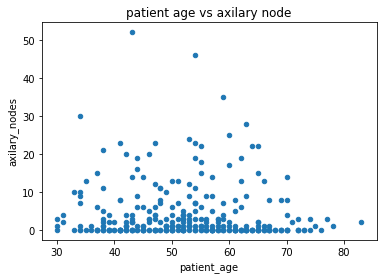

In [9]:
df.plot(kind='scatter', x='patient_age', y='axilary_nodes')
plt.title('patient age vs axilary node')
plt.show()
#this doesn't give informantion about dataset

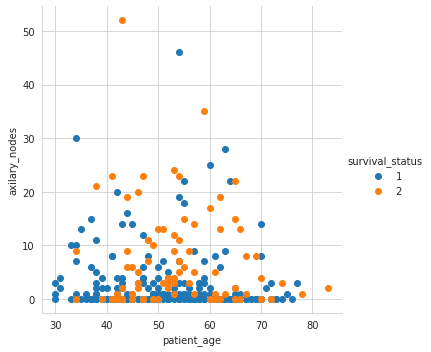

In [10]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'survival_status', height=5)\
    .map(plt.scatter, 'patient_age', 'axilary_nodes')\
    .add_legend()
plt.show()

observation
1. patient age and axilary nodes are overlap
2. It can't be seperated as they have considirable overlap.

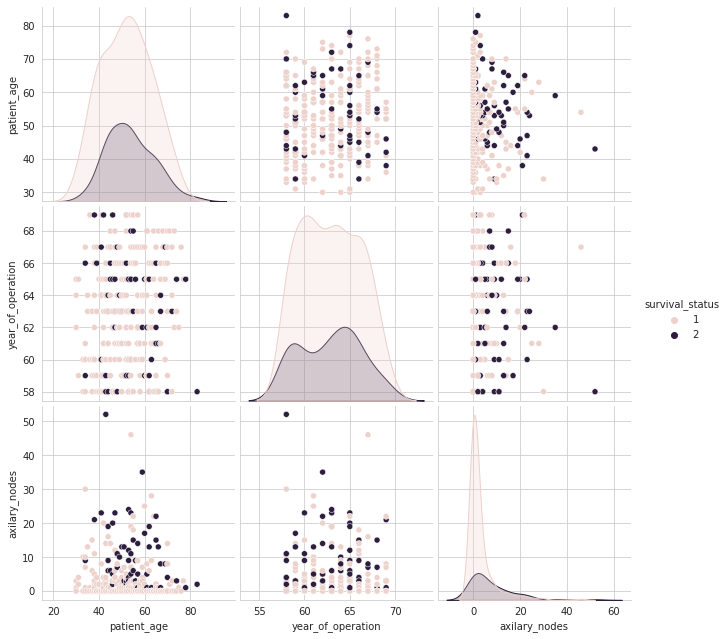

In [11]:
#from pair plot we can get each feature w.r.t all feature dependancies
sns.set_style('whitegrid')
sns.pairplot(df, hue = 'survival_status', height = 3)
plt.show()

Observation
1. Not any pair of features is easly seperated by linear seperable method.

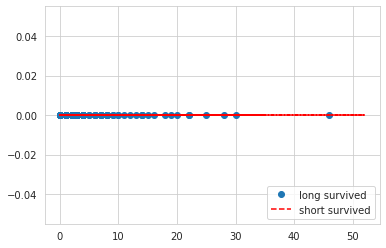

In [12]:
#Histogram
patient_long_survived = df.loc[df['survival_status'] == 1]
patient_short_survived = df.loc[df['survival_status'] == 2]

plt.plot(patient_long_survived['axilary_nodes'],np.zeros_like(patient_long_survived['axilary_nodes']),'o')
plt.plot(patient_short_survived['axilary_nodes'],np.zeros_like(patient_short_survived['axilary_nodes']),'r--')
plt.legend(['long survived', 'short survived'], loc = 'lower right')
plt.show()


# PDF with histplot

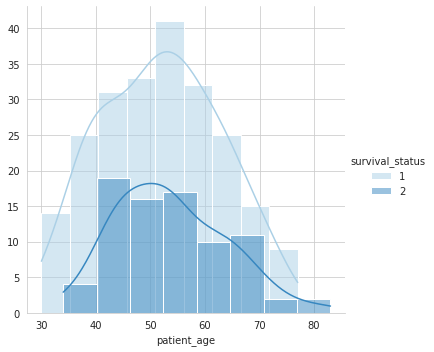

In [13]:
sns.FacetGrid(df, hue = 'survival_status', height= 5, palette="Blues")\
    .map(sns.histplot ,'patient_age', kde = True)\
    .add_legend()
plt.show()

Observation:
1. major overlapping so, survival rate is irrespective of person's age.

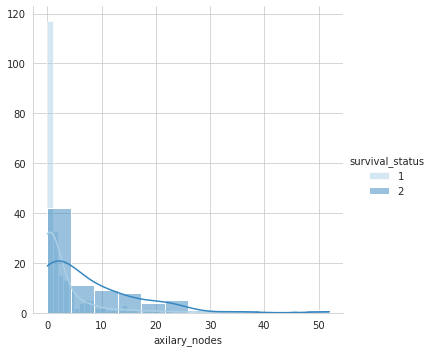

In [14]:
sns.FacetGrid(df, hue = 'survival_status', height= 5, palette="Blues")\
    .map(sns.histplot ,'axilary_nodes', kde = True)\
    .add_legend()
plt.show()

Observation:
1. person with 0 nodes have a high chance of survival.
2. person with 20 or more nodes have very few chance to survive.

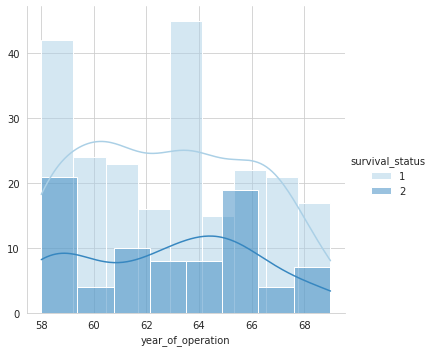

In [15]:
sns.FacetGrid(df, hue = 'survival_status', height= 5, palette="Blues")\
    .map(sns.histplot ,'year_of_operation', kde = True)\
    .add_legend()
plt.show()

Observation:
1. major overlapping so, it is deficult to come out in any conclusion

# CDF

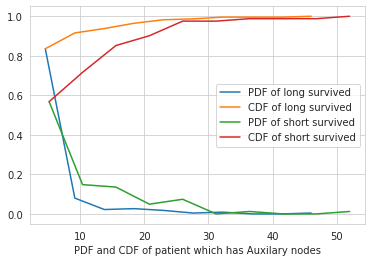

In [16]:
#long survives
counts, bin_edges = np.histogram(patient_long_survived['axilary_nodes'],bins = 10, density = True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(patient_short_survived['axilary_nodes'],bins = 10, density = True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('PDF and CDF of patient which has Auxilary nodes')
plt.legend(['PDF of long survived','CDF of long survived', 'PDF of short survived', 'CDF of short survived'])

plt.show()

Observation:
1. about 82% person who survived had auxilary nodes less than 8.
2. about 95% person who died had auxilary nodes more than 25.

# Mean, Variance, Std-dev :

In [17]:
#mean of number of nodes
print('-'*30,"LONG SURVIVED",'-'*40,'\n')

print(patient_long_survived.describe())

print('\n','-'*30,"SHORT SURVIVED",'-'*40,'\n')

print(patient_short_survived.describe())

------------------------------ LONG SURVIVED ---------------------------------------- 

       patient_age  year_of_operation  axilary_nodes  survival_status
count   225.000000         225.000000     225.000000            225.0
mean     52.017778          62.862222       2.791111              1.0
std      11.012154           3.222915       5.870318              0.0
min      30.000000          58.000000       0.000000              1.0
25%      43.000000          60.000000       0.000000              1.0
50%      52.000000          63.000000       0.000000              1.0
75%      60.000000          66.000000       3.000000              1.0
max      77.000000          69.000000      46.000000              1.0

 ------------------------------ SHORT SURVIVED ---------------------------------------- 

       patient_age  year_of_operation  axilary_nodes  survival_status
count    81.000000          81.000000      81.000000             81.0
mean     53.679012          62.827160       7.45679

observation:
1. 75% of people survived which has avg 3 nodes.
2. 75% of people died which has avg 11 nodes.
3. people with 0 nodes has more likely to survive

# Median, Quantile, Percentile,MAD

In [18]:
print('-'*30,"Median Long Survived",'-'*40,'\n')
print('axillary nodes : ',np.median(patient_long_survived['axilary_nodes']))
print('patients age : ',np.median(patient_long_survived['patient_age']))

print('-'*30,"Median Short Survived",'-'*40,'\n')
print('axillary nodes : ',np.median(patient_short_survived['axilary_nodes']))
print('patients age : ',np.median(patient_short_survived['patient_age']))

print('-'*30,"90 % Percentile Long Survived",'-'*40,'\n')
print('axillary nodes : ',np.percentile(patient_long_survived['axilary_nodes'],90))
print('patients age : ',np.percentile(patient_long_survived['patient_age'],90))

print('-'*30,"90 % Percentile Short Survived",'-'*40,'\n')
print('axillary nodes : ',np.percentile(patient_short_survived['axilary_nodes'],90))
print('patients age : ',np.percentile(patient_short_survived['patient_age'],90))

print('-'*30,"Quantile Long Survived",'-'*40,'\n')
print('axillary nodes : ',np.percentile(patient_long_survived['axilary_nodes'],np.arange(25,101,25)))
print('patients age : ',np.percentile(patient_long_survived['patient_age'],np.arange(25,101,25)))

print('-'*30,"Quantile Short Survived",'-'*40,'\n')
print('axillary nodes : ',np.percentile(patient_short_survived['axilary_nodes'],np.arange(25,101,25)))
print('patients age : ',np.percentile(patient_short_survived['patient_age'],np.arange(25,101,25)))

########################################################
from statsmodels import robust

print('-'*30,"MAD Long Survived",'-'*40,'\n')
print('axillary nodes : ',robust.mad(patient_long_survived['axilary_nodes'],90))
print('patients age : ',robust.mad(patient_long_survived['patient_age'],90))

print('-'*30,"MAD Short Survived",'-'*40,'\n')
print('axillary nodes : ',robust.mad(patient_short_survived['axilary_nodes'],90))
print('patients age : ',robust.mad(patient_short_survived['patient_age'],90))

------------------------------ Median Long Survived ---------------------------------------- 

axillary nodes :  0.0
patients age :  52.0
------------------------------ Median Short Survived ---------------------------------------- 

axillary nodes :  4.0
patients age :  53.0
------------------------------ 90 % Percentile Long Survived ---------------------------------------- 

axillary nodes :  8.0
patients age :  67.0
------------------------------ 90 % Percentile Short Survived ---------------------------------------- 

axillary nodes :  20.0
patients age :  67.0
------------------------------ Quantile Long Survived ---------------------------------------- 

axillary nodes :  [ 0.  0.  3. 46.]
patients age :  [43. 52. 60. 77.]
------------------------------ Quantile Short Survived ---------------------------------------- 

axillary nodes :  [ 1.  4. 11. 52.]
patients age :  [46. 53. 61. 83.]
------------------------------ MAD Long Survived ---------------------------------------- 



observation:
1. The avg nodes of person who died is 4.
2. Around 90% people died which has axillary node is greater then 20.
3. Around 90% people survived which has axillary node less then 8.

#Box plot

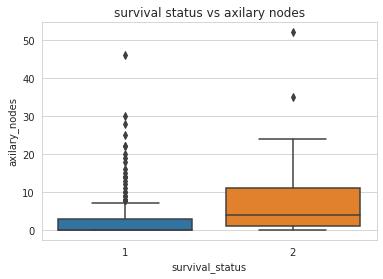

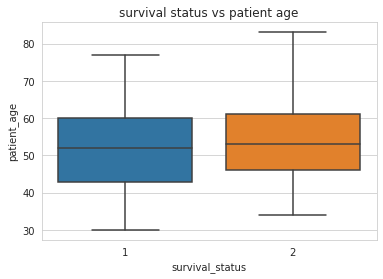

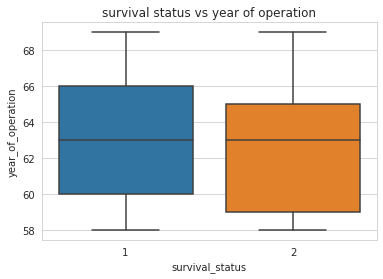

In [19]:
sns.boxplot(x='survival_status',y = 'axilary_nodes', data = df)
plt.title('survival status vs axilary nodes')
plt.show()

sns.boxplot(x='survival_status',y = 'patient_age', data = df)
plt.title('survival status vs patient age')
plt.show()

sns.boxplot(x='survival_status',y = 'year_of_operation', data = df)
plt.title('survival status vs year of operation')
plt.show()

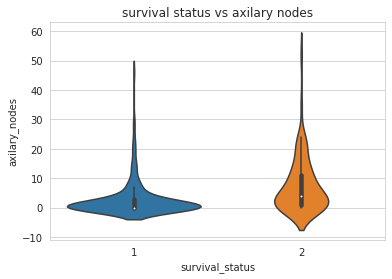

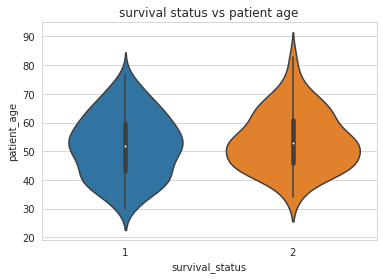

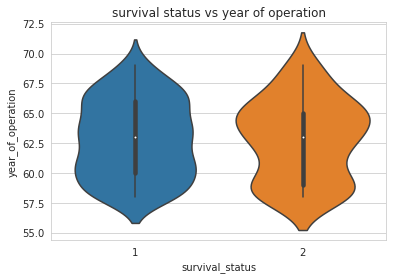

In [20]:
sns.violinplot(x='survival_status',y = 'axilary_nodes', data = df)
plt.title('survival status vs axilary nodes')
plt.show()

sns.violinplot(x='survival_status',y = 'patient_age', data = df)
plt.title('survival status vs patient age')
plt.show()

sns.violinplot(x='survival_status',y = 'year_of_operation', data = df)
plt.title('survival status vs year of operation')
plt.show()

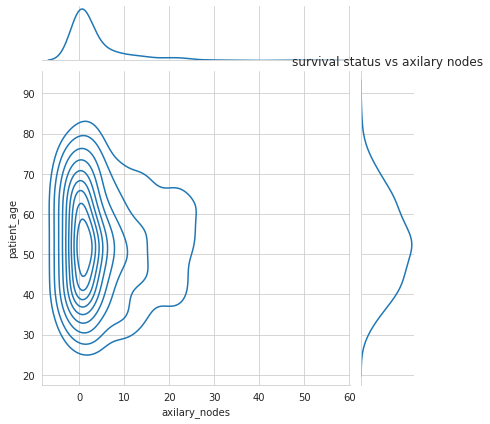

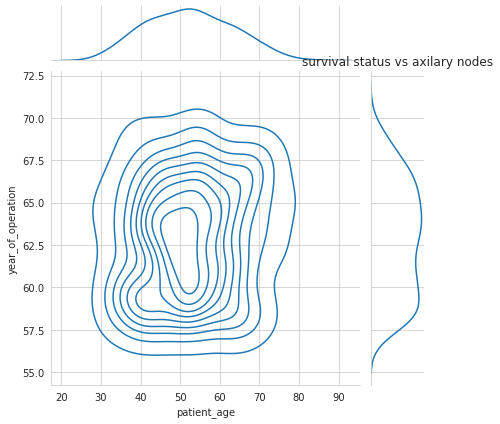

In [21]:
sns.jointplot(x='axilary_nodes',y = 'patient_age', data = df, kind='kde')
plt.title('survival status vs axilary nodes')
plt.show()

sns.jointplot(x='patient_age',y = 'year_of_operation', data = df, kind='kde')
plt.title('survival status vs axilary nodes')
plt.show()

# Final observation
1. all the features are hevely mixed so it can't be seperated by linear seperable method
2. 90 % people died whith an axilarry node greater than 20.
3. people with 0 node are most likely to survive
4. aroud 75% of people survived with avg node 3.
5. This is imbalance dataset and binary classification.
6. people which 40 < Age < 63 with axilary < 3 has likely to survive.
7. around 1960 -1965 has more unsuccesful operations.
8. less axilary node more chance of survival